In [2]:
include("../EuclidElements.jl");

# Book 1

## Proposition 8

If two triangles have the two sides equal to two sides respectively, and have also the base equal to the base, they will also have the angles equal which are contained by the equal straight lines.

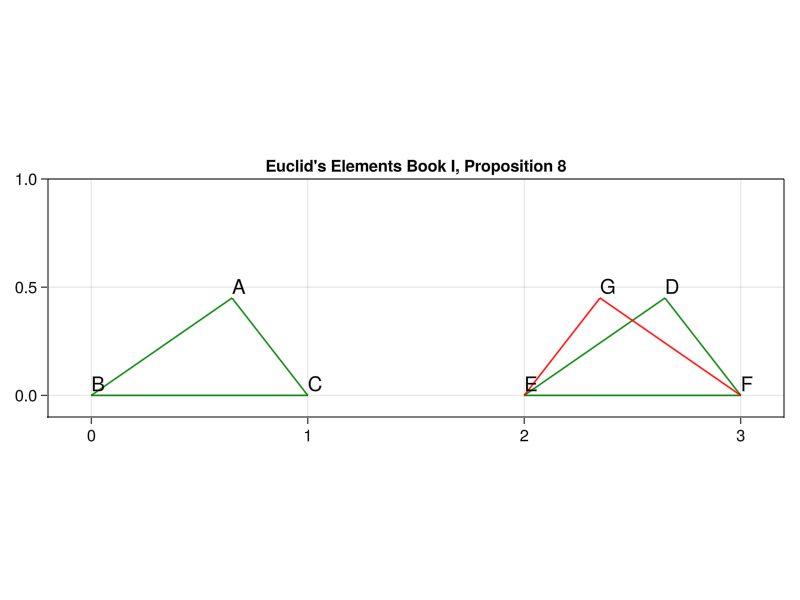

In [9]:
# Euclid uses I.7 to show you can't construct a triangle with different angles but equal sides

#Setup points ABC for triangle w/ base BC
A = Point2f0(0.65,0.45)
B = Point2f0(0,0)
C = Point2f0(1,0)

#Setup points DEF for triangle w/ base EF
D = Point2f0(2.65,0.45)
E = Point2f0(2,0)
F = Point2f0(3,0)

#Setup point G to show GEF cannot be the same as DEF or ABC 
G = Point2f0(2.35, 0.45)

# Euclid says that since AB = DE, BC = EF, AC = DF, we can't draw
#   any other triangle that would have different angles within them
#   We can show this a bit on animation, but the idea is there in figure 

#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 8")
xlims!(ax, -0.2,3.2)
ylims!(ax, -0.1,1)

# Draw the lines
lines!([A,B], color=:green)
lines!([A,C], color=:green)
lines!([B,C], color=:green)
lines!([D,E], color=:green)
lines!([D,F], color=:green)
lines!([E,F], color=:green)
lines!([G,E], color=:red)
lines!([G,F], color=:red)

#Now draw the point labels
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(D, text="D")
Epoint = text!(E, text="E")
Fpoint = text!(F, text="F")
Gpoint = text!(G, text="G")


#Draw and show the chart :)
current_figure()

### Animation

In [26]:
# Using the same points as above

#Animation value for G
G_opac = Observable(0f0)

#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 8")
xlims!(ax, -0.2,3.2)
ylims!(ax, -0.1,2)

# Setup to draw the initial line comparisons
AB_cmp_DE = compare_lines(B, A, E, D, Point2f0(0, 0.5), 0.5f0π, precision=5, linewidth=5f0, color=:pink, cursorcolor=:pink, cursorlinewidth=0.75f0)
AC_cmp_DF = compare_lines(C, A, F, D, Point2f0(3, 0.5), 0.5f0π, precision=5, linewidth=5f0, color=:pink, cursorcolor=:pink, cursorlinewidth=0.75f0)
BC_cmp_EF = compare_lines(B, C, E, F, Point2f0(1.5, 0.5), 0.5f0π, precision=5, linewidth=5f0, color=:pink, cursorcolor=:pink, cursorlinewidth=0.75f0)

# Setup the final triangle comparisons 
GEF_cmp_ABC = compare_triangle(C, B, A, F, E, G, Point2f0(1.0, 0.5), 0f0, precision=5, cursorcolor=:pink, color=:pink, linewidth=5f0, cursorlinewidth=0.75f0)
DEF_cmp_ABC = compare_triangle(C, B, A, F, E, D, Point2f0(1.0, 0.5), 0f0, precision=5, cursorcolor=:pink, color=:pink, linewidth=5f0, cursorlinewidth=0.75f0)

# Draw the lines
lines!([A,B], color=:green)
lines!([A,C], color=:green)
lines!([B,C], color=:green)
lines!([D,E], color=:green)
lines!([D,F], color=:green)
lines!([E,F], color=:green)

# Setup to Draw GEF 
GE = straight_line(E, G, color=:red, linewidth=1f0, cursorwidth=0.01f0)
GF = straight_line(F, G, color=:red, linewidth=1f0, cursorwidth=0.01f0)

#Now draw the point labels
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(D, text="D")
Epoint = text!(E, text="E")
Fpoint = text!(F, text="F")

text!(G, text="G", color=@lift(RGBA(1,0,0,$G_opac)))

# Draw the animation!
framerate = 24
d_s = 24
timestamps = range(0, 6π, step=6π/(d_s*framerate))

record(f, "Euclid-I-8.gif", timestamps; framerate=framerate) do t
    # animate drawing initial line compares
    animate_linecompare(AB_cmp_DE, 0.5π, π, t, fade_start=2.5π, fade_end=3π)
    animate_linecompare(AC_cmp_DF, π, 1.5π, t, fade_start=2.5π, fade_end=3π)
    animate_linecompare(BC_cmp_EF, 1.5π, 2π, t, fade_start=2.5π, fade_end=3π)

    # Animate drawing GEF, starting w/ text, then lines
    if t > 2π && t < 2.25π
        G_opac[] = (t-2π)/0.25π
    elseif t >= 2.25π && t <= 4.25π
        G_opac[] = 1f0
    elseif t > 4.25π && t < 4.5π
        G_opac[] = 1f0-(t-4.25π)/0.25π
    else
        G_opac[] = 0
    end
    animate_line(GE, 2.25π, 2.75π, t, fade_start=4.25π, fade_end=4.5π)
    animate_line(GF, 2.75π, 3.25π, t, fade_start=4.25π, fade_end=4.5π)

    # Animate drawing GEF vs ABC and then DEF vs ABC 
    animate_tricompare(GEF_cmp_ABC, 3.5π, 4π, t, fade_start=4π+0.01, fade_end=4.5π)
    animate_tricompare(DEF_cmp_ABC, 4.5π, 5π, t)
end;

![animation](Euclid-I-8.gif)